In [87]:

import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [88]:
DATA_FILENAME = "uncleaned_ds_jobs.csv"
df = pd.read_csv(DATA_FILENAME)
df.head()


,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [89]:
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '000')
df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.extract(r'\$(\d+)-\$(\d+)').astype(int)

df['Salary Estimate'] = df.apply(lambda row: f"{row['min_salary']}-{row['max_salary']}", axis=1)

df.drop('index',axis=1, inplace=True)

In [90]:
# Podziel dane w kolumnie "company name" na dwie osobne kolumny
df[['Location City', 'Location State']] = df['Location'].str.extract(r'^(.*),\s(.*)$')

df.drop(columns=['Location'], inplace=True)
# Wstawienie nowych kolumn 'City' i 'State' na pozycjach 6 i 7
df.insert(loc=5, column='Location City', value=df.pop('Location City'))
df.insert(loc=6, column='Location State', value=df.pop('Location State'))

# Display the result
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location City,Location State,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary
0,Sr Data Scientist,137000-171000,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,New York,NY,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000
1,Data Scientist,137000-171000,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,Chantilly,VA,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000
2,Data Scientist,137000-171000,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,Boston,MA,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000
3,Data Scientist,137000-171000,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,Newton,MA,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000
4,Data Scientist,137000-171000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,New York,NY,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000


In [91]:
# Function to clear the 'Company Name' column and delete everything after "\n".
def clean_company_name(company_name):
    if "\n" in company_name:
        return company_name.split("\n")[0]
    else:
        return company_name

# Applying the function to the column 'Company Name'.
df['Company Name'] = df['Company Name'].apply(clean_company_name)

df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location City,Location State,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary
0,Sr Data Scientist,137000-171000,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,New York,NY,"New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000
1,Data Scientist,137000-171000,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,Chantilly,VA,"Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000
2,Data Scientist,137000-171000,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,Boston,MA,"Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000
3,Data Scientist,137000-171000,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,Newton,MA,"Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000
4,Data Scientist,137000-171000,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,NY,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000


In [92]:
import re
# Lista umiejętności
skills = ['Python', 'SQL', 'Machine Learning', 'Data Analysis', 'Statistics', 'R', 'Java', 'Data Visualization', 'Big Data', 'Deep Learning', 'TensorFlow', 'PyTorch', 'Natural Language Processing', 'NLP', 'Computer Vision', 'Degree','Bachelor', 'Master', 'AWS', 'Azure', 'Database']

# Funkcja do zliczania unikalnych wystąpień danej umiejętności w tekście
def count_unique_skill(text, skill):
    unique_skill = set(re.findall(r'\b{}\b'.format(skill), text, flags=re.IGNORECASE))
    return 1 if unique_skill else 0

# Utworzenie pustej listy na dane o liczbie wystąpień każdej umiejętności
skills_data = []

# Iteracja po każdej umiejętności
for skill in skills:
    # Utworzenie kolumny z liczbą wystąpień danej umiejętności w opisach stanowisk pracy
    df[skill] = df['Job Description'].apply(lambda x: count_unique_skill(x, skill))
    # Zsumowanie liczby wystąpień danej umiejętności
    total_skill_records = df[skill].sum()
    # Dodanie informacji o liczbie wystąpień do listy skills_data
    skills_data.append({'Umiejętność': skill, 'Liczba_wystąpień': total_skill_records})

# Utworzenie DataFrame na podstawie listy skills_data
skills_table = pd.DataFrame(skills_data)

# Wyświetlenie tabeli z informacjami o liczbie wystąpień każdej umiejętności
#skills_table


sorted_skills_table = skills_table.sort_values(by='Liczba_wystąpień', ascending=False)

# Procentowe udziały wystąpień każdej umiejętności w ogólnej liczbie opisów
percentages = (sorted_skills_table['Liczba_wystąpień'] / len(df)) * 100



<Figure size 1000x600 with 0 Axes>

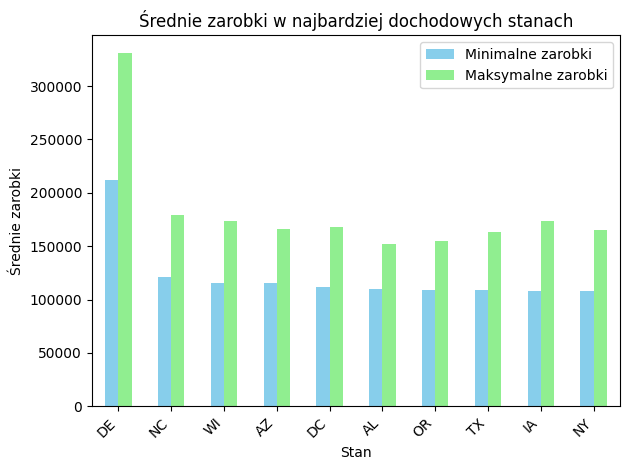

In [93]:
# Oblicz średnie zarobki dla każdej lokalizacji

# Wyodrębnij stany z lokalizacji
#df['state'] = df['Location'].str.split(',').str[-1].str.strip()

# Oblicz średnie zarobki dla każdego stanu
average_salaries_state = df.groupby('Location State')[['min_salary', 'max_salary']].mean()

# Wybierz 10 stanów z najwyższymi średnimi zarobkami
top_states = average_salaries_state.sort_values(by='min_salary', ascending=False).head(10)

# Stwórz wykres
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Średnie zarobki w najbardziej dochodowych stanach')
plt.xlabel('Stan')
plt.ylabel('Średnie zarobki')
plt.xticks(rotation=45, ha='right')
plt.legend(['Minimalne zarobki', 'Maksymalne zarobki'])
plt.tight_layout()
plt.show()



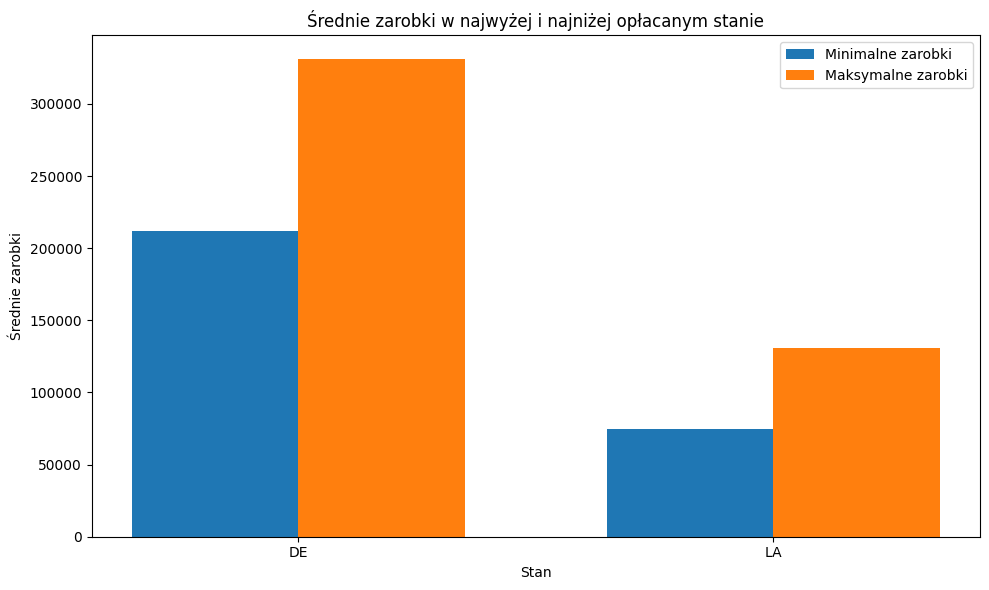

In [94]:
# Różnica pomiędzy top 1 a bot 1
top_salary = average_salaries_state.sort_values(by='min_salary', ascending=False).head(1)
lowest_salary = average_salaries_state.sort_values(by='min_salary', ascending=False).tail(1)

# Pobierz nazwy stanów dla top 1 i bot 1
top_state_name = top_salary.index[0]
bot_state_name = lowest_salary.index[0]

# Stwórz wykres
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(2)

top_values = top_salary.values.flatten()
bot_values = lowest_salary.values.flatten()

plt.bar(index, [top_values[0], bot_values[0]], bar_width, label='Minimalne zarobki')
plt.bar([i + bar_width for i in index], [top_values[1], bot_values[1]], bar_width, label='Maksymalne zarobki')

plt.xlabel('Stan')
plt.ylabel('Średnie zarobki')
plt.title('Średnie zarobki w najwyżej i najniżej opłacanym stanie')
plt.xticks([i + bar_width / 2 for i in index], [top_state_name, bot_state_name])
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
# Mapowanie wielkości firm na kategorie
def map_company_size(size):
    if 'employees' in size:
        num_employees = size.split()[0]
        if num_employees.isdigit():
            num_employees = int(num_employees)
            if num_employees <= 100:
                return 'Mała firma'
            elif num_employees <= 500:
                return 'Średnia firma'
            else:
                return 'Duża firma'
        else:
            # Jeśli liczba pracowników jest nieznana, zakładamy, że to duża firma
            return 'Duża firma'
    else:
        # Pomijamy firmy o nieznanej kategorii
        return None

# Stworzenie nowej kolumny z kategorią wielkości firmy
df['company_category'] = df['Size'].apply(map_company_size)

# Usunięcie firm o nieznanej kategorii
df_cleaned = df.dropna(subset=['company_category'])

# Obliczenie liczby firm w każdej kategorii
company_counts = df_cleaned['company_category'].value_counts()

print(company_counts)

# średnie wynagodzenie w małych firmach
small_companies = df[df['company_category'] == 'Mała firma']
small_average_salary = small_companies[['min_salary','max_salary']].mean()

# średnie wynagodzenie w małych firmach
medium_companies = df[df['company_category'] == 'Średnia firma']
medium_average_salary = medium_companies[['min_salary','max_salary']].mean()

# średnie wynagodzenie w małych firmach
large_companies = df[df['company_category'] == 'Duża firma']
large_average_salary = large_companies[['min_salary','max_salary']].mean()



print(f"Średnie wynagrodzenie w małych firmach: ${small_average_salary.values[0]:.2f}")
print(f"Średnie wynagrodzenie w średnich firmach: ${medium_average_salary.values[0]:.2f}")
print(f"Średnie wynagrodzenie w dużych firmach: ${large_average_salary.values[0]:.2f}")


company_category
Duża firma       322
Mała firma       221
Średnia firma     85
Name: count, dtype: int64
Średnie wynagrodzenie w małych firmach: $100285.07
Średnie wynagrodzenie w średnich firmach: $94858.82
Średnie wynagrodzenie w dużych firmach: $98139.75


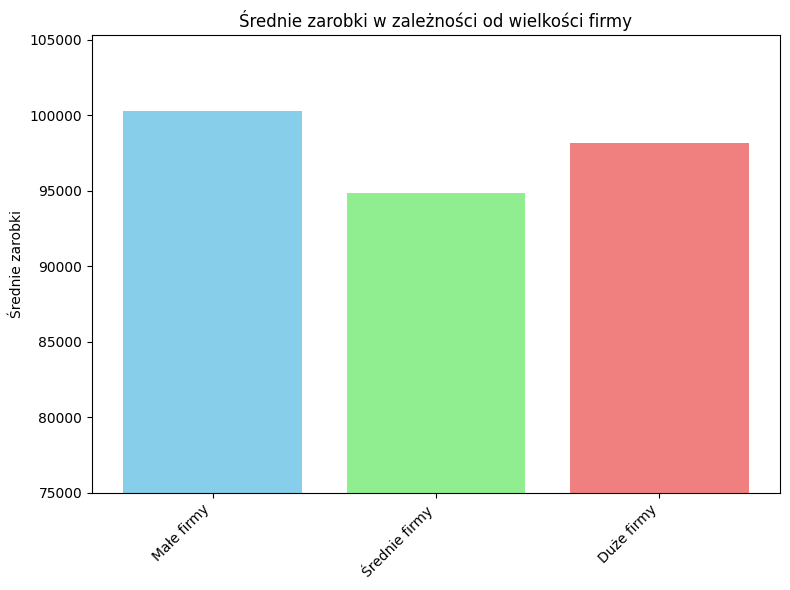

In [96]:
categories = ['Małe firmy', 'Średnie firmy', 'Duże firmy']
average_salaries = [small_average_salary.values[0], medium_average_salary.values[0], large_average_salary.values[0]]

# Stworzenie wykresu
plt.figure(figsize=(8, 6))
plt.bar(categories, average_salaries, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Średnie zarobki w zależności od wielkości firmy')
plt.ylabel('Średnie zarobki')
plt.xticks(rotation=45, ha='right')
max_value = max(average_salaries)
plt.ylim(bot_values[0], )
plt.tight_layout()
plt.show()


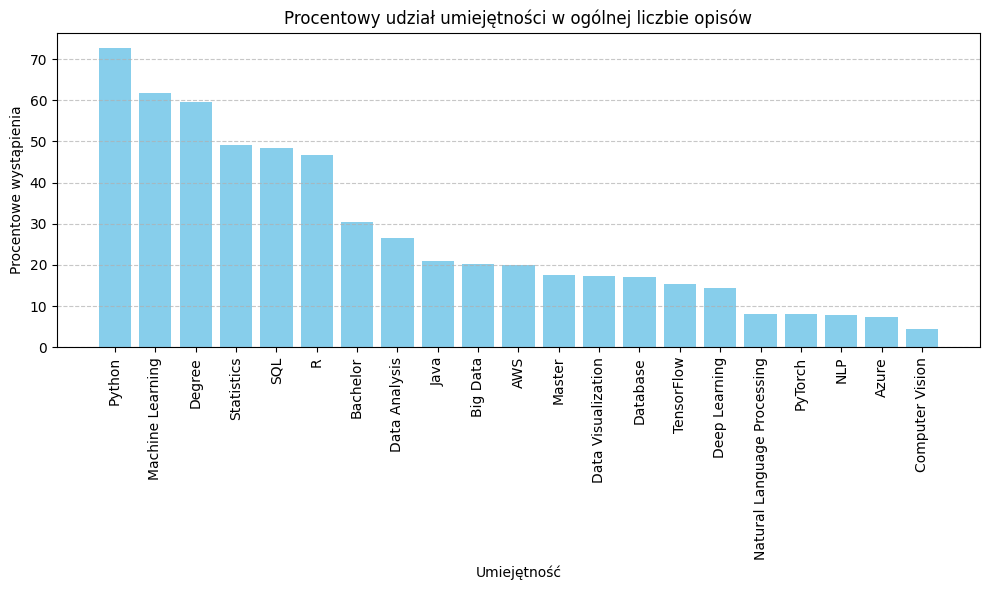

In [97]:
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(sorted_skills_table['Umiejętność'], percentages, color='skyblue')
plt.title('Procentowy udział umiejętności w ogólnej liczbie opisów')
plt.xlabel('Umiejętność')
plt.ylabel('Procentowe wystąpienia')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()